<a href="https://colab.research.google.com/github/joshIsac/DeepLearningLab/blob/main/2348523_perceptronandgradientdescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import matplotlib.pyplot as plt

AND Function - Manually assigned weights:
Initial Predictions: [1 0 1 1]
Number of Errors: 2


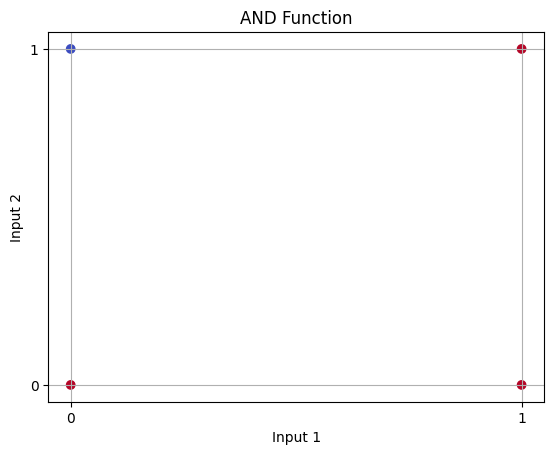


OR Function - Manually assigned weights:
Initial Predictions: [1 1 1 1]
Number of Errors: 1


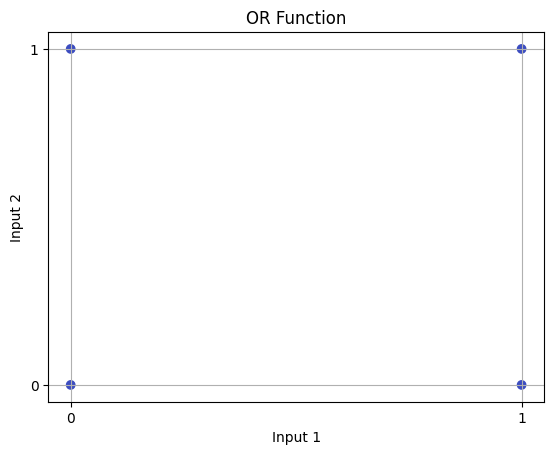


NAND Function - Manually assigned weights:
Initial Predictions: [0 1 0 0]
Number of Errors: 2


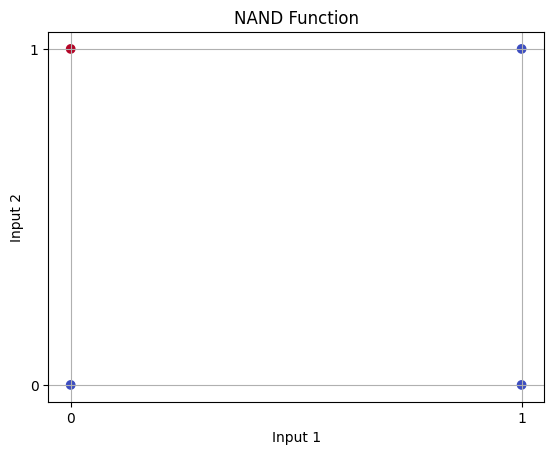


XOR function cannot be represented by a single-layer perceptron.


In [67]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, inp, learning_rate=0.01, epochs=100):
        self.weights = np.zeros(inp + 1)
        self.learning_rate = learning_rate
        self.epochs = epochs

    def step(self, x):
        return 1 if x > 0 else 0

    def fit(self, X, y):
        for _ in range(self.epochs):
            for x, target in zip(X, y):
                prediction = self.predict(x)
                self.weights[1:] += self.learning_rate * (target - prediction) * x
                self.weights[0] += self.learning_rate * (target - prediction)

    def predict(self, X):
        summation = np.dot(X, self.weights[1:]) + self.weights[0]
        return self.step(summation)

def plot_predictions(X, predictions, title):
    plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='coolwarm')
    plt.title(title)
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.xticks([0, 1])
    plt.yticks([0, 1])
    plt.grid(True)
    plt.show()

def main():
    # AND function
    X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_and = np.array([0, 0, 0, 1])
    perceptron_and = Perceptron(2)
    manual_weights_and = np.array([0.5, 0.5, -0.7])  # Manually assigned weights
    perceptron_and.weights = manual_weights_and
    predictions_and = np.array([perceptron_and.predict(x) for x in X_and])
    print("AND Function - Manually assigned weights:")
    print("Initial Predictions:", predictions_and)
    errors_and = np.sum(np.abs(y_and - predictions_and))
    print("Number of Errors:", errors_and)
    plot_predictions(X_and, predictions_and, 'AND Function')

    # OR function
    X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_or = np.array([0, 1, 1, 1])
    perceptron_or = Perceptron(2)
    manual_weights_or = np.array([0.5, 0.5, -0.2])  # Manually assigned weights
    perceptron_or.weights = manual_weights_or
    predictions_or = np.array([perceptron_or.predict(x) for x in X_or])
    print("\nOR Function - Manually assigned weights:")
    print("Initial Predictions:", predictions_or)
    errors_or = np.sum(np.abs(y_or - predictions_or))
    print("Number of Errors:", errors_or)
    plot_predictions(X_or, predictions_or, 'OR Function')

    # NAND function
    X_nand = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_nand = np.array([1, 1, 1, 0])
    perceptron_nand = Perceptron(2)
    manual_weights_nand = np.array([-0.5, -0.5, 0.7])  # Manually assigned weights
    perceptron_nand.weights = manual_weights_nand
    predictions_nand = np.array([perceptron_nand.predict(x) for x in X_nand])
    print("\nNAND Function - Manually assigned weights:")
    print("Initial Predictions:", predictions_nand)
    errors_nand = np.sum(np.abs(y_nand - predictions_nand))
    print("Number of Errors:", errors_nand)
    plot_predictions(X_nand, predictions_nand, 'NAND Function')

    # XOR function (requires multi-layer perceptron or more complex networks)
    print("\nXOR function cannot be represented by a single-layer perceptron.")

if __name__ == "__main__":
    main()


In [68]:
import numpy as np

class Perceptron:
    def __init__(self, inp, weights=None, learning_rate=0.01, epochs=100):
        if weights is None:
            self.weights = np.zeros(inp + 1)
        else:
            self.weights = weights
        self.learning_rate = learning_rate
        self.epochs = epochs

    def step(self, x):
        return 1 if x > 0 else 0

    def fit(self, X, y):
        errors = 0
        for _ in range(self.epochs):
            errors = 0
            for x, target in zip(X, y):
                prediction = self.predict(x)
                self.weights[1:] += self.learning_rate * (target - prediction) * x
                self.weights[0] += self.learning_rate * (target - prediction)
                errors += int(target != prediction)
            if errors == 0:
                break
        return errors

    def predict(self, X):
        summation = np.dot(X, self.weights[1:]) + self.weights[0]
        return self.step(summation)

def calculate_accuracy(predictions, errors):
    total_samples = len(predictions)
    correct_predictions = total_samples - errors
    accuracy = correct_predictions / total_samples
    return accuracy

def main():
    # Manually assigned weights for AND function
    weights_and = np.array([-0.5, 0.5, 0.5])
    # AND function
    X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_and = np.array([0, 0, 0, 1])
    perceptron_and = Perceptron(2, weights=weights_and)
    errors_and = perceptron_and.fit(X_and, y_and)
    initial_predictions_and = [perceptron_and.predict(x) for x in X_and]
    accuracy_and = calculate_accuracy(initial_predictions_and, errors_and)
    print("AND Function - Manually assigned weights:")
    print("Initial Predictions:", initial_predictions_and)
    print("Number of Errors:", errors_and)
    print("Accuracy:", accuracy_and)

    # Manually assigned weights for OR function
    weights_or = np.array([-0.5, 1, 1])
    # OR function
    X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_or = np.array([0, 1, 1, 1])
    perceptron_or = Perceptron(2, weights=weights_or)
    errors_or = perceptron_or.fit(X_or, y_or)
    initial_predictions_or = [perceptron_or.predict(x) for x in X_or]
    accuracy_or = calculate_accuracy(initial_predictions_or, errors_or)
    print("\nOR Function - Manually assigned weights:")
    print("Initial Predictions:", initial_predictions_or)
    print("Number of Errors:", errors_or)
    print("Accuracy:", accuracy_or)

    # Manually assigned weights for NAND function
    weights_nand = np.array([0.5, -1, -1])
    # NAND function
    X_nand = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_nand = np.array([1, 1, 1, 0])
    perceptron_nand = Perceptron(2, weights=weights_nand)
    errors_nand = perceptron_nand.fit(X_nand, y_nand)
    initial_predictions_nand = [perceptron_nand.predict(x) for x in X_nand]
    accuracy_nand = calculate_accuracy(initial_predictions_nand, errors_nand)
    print("\nNAND Function - Manually assigned weights:")
    print("Initial Predictions:", initial_predictions_nand)
    print("Number of Errors:", errors_nand)
    print("Accuracy:", accuracy_nand)

    # XOR function (requires multi-layer perceptron or more complex networks)
    print("\nXOR function cannot be represented by a single-layer perceptron.")

if __name__ == "__main__":
    main()


AND Function - Manually assigned weights:
Initial Predictions: [0, 0, 0, 1]
Number of Errors: 0
Accuracy: 1.0

OR Function - Manually assigned weights:
Initial Predictions: [0, 1, 1, 1]
Number of Errors: 0
Accuracy: 1.0

NAND Function - Manually assigned weights:
Initial Predictions: [1, 1, 1, 0]
Number of Errors: 0
Accuracy: 1.0

XOR function cannot be represented by a single-layer perceptron.


another code of perceptron after weights being changed and accuracy achieved as 1.0

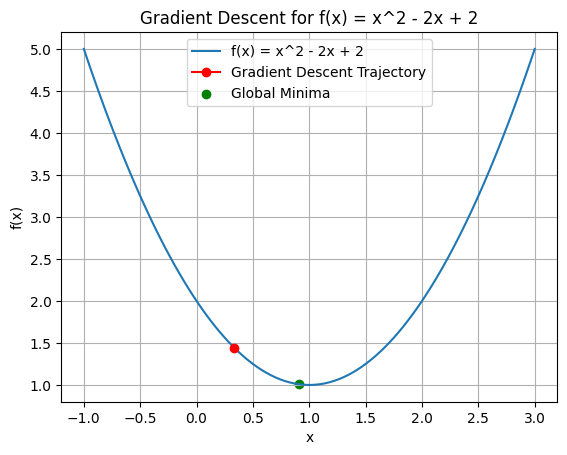

For f(x) = x^2 - 2x + 2:
Global Minima: 0.9103488081732949
Iterations: 87


In [69]:
#2)Gradient descend algorithm
import numpy as np
import matplotlib.pyplot as plt

#definition of function f(x)
def func(x):
  return x**2 - 2*x + 2

def derive(x):
  return 2*x-2

#gradient descent
def grad_descent(lr,precision,n=np.random.randint(0,100)):
  x=np.random.rand()
  ini_x = x
  iter=0

  for _ in range(n):
    x_new=x-lr*derive(x)
    if abs(x_new - x )<precision:
      break
      x=x_new
    iter += 1
  return x ,iter,ini_x

lr=0.01
precision=0.001
ini_x=np.random.rand()


# Execute Gradient Descent for f(x) = x^2 - 2x + 2
minima_f1 , iter_f1,x_val=grad_descent(lr, precision )

# Plot the function
x = np.linspace(-1, 3, 100)
plt.plot(x, func(x), label='f(x) = x^2 - 2x + 2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent for f(x) = x^2 - 2x + 2')

# Plot the trajectory of x values
plt.plot(ini_x, func(np.array(ini_x)), '-o', color='red', label='Gradient Descent Trajectory')
plt.scatter(minima_f1, func(minima_f1), color='green', label='Global Minima')
plt.legend()
plt.grid(True)
plt.show()


print("For f(x) = x^2 - 2x + 2:")
print("Global Minima:", minima_f1)
print("Iterations:", iter_f1)


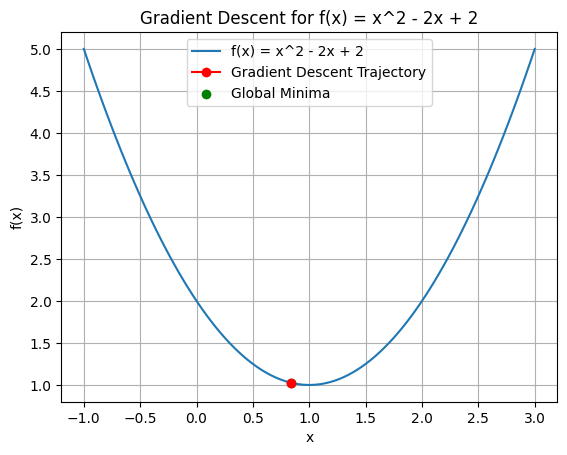

For f(x) = x^2 - 2x + 2:
Global Minima: 0.8376469105184108
Iterations: 25


In [70]:
#2)Gradient descend algorithm
import numpy as np
import matplotlib.pyplot as plt

#definition of function f(x)
def func(x):
  return x**2 - 2*x + 2

def derive(x):
  return 2*x-2

#gradient descent
def grad_descent(lr,precision,n=np.random.randint(0,100)):
  x=np.random.rand()
  ini_x = x
  iter=0

  for _ in range(n):
    x_new=x-lr*derive(x)
    if abs(x_new - x )<precision:
      break
      x=x_new
    iter += 1
  return x ,iter,ini_x

lr=0.01
precision=0.001
ini_x=np.random.rand()


# Execute Gradient Descent for f(x) = x^2 - 2x + 2
minima_f1 , iter_f1,ini_x=grad_descent(lr, precision )

# Plot the function
x = np.linspace(-1, 3, 100)
plt.plot(x, func(x), label='f(x) = x^2 - 2x + 2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent for f(x) = x^2 - 2x + 2')

# Plot the trajectory of x values
plt.plot(ini_x, func(np.array(ini_x)), '-o', color='red', label='Gradient Descent Trajectory')
plt.scatter(minima_f1, func(minima_f1), color='green', label='Global Minima')
plt.legend()
plt.grid(True)
plt.show()


print("For f(x) = x^2 - 2x + 2:")
print("Global Minima:", minima_f1)
print("Iterations:", iter_f1)


gradient descent is a numerical optimisation algorithm that aims to find the optimal parameters i.e weights and biases of neural network by minimizing the cost function .
GD is widely used optimization algorithm in machine learning and deep learning that minimises the cost function of a neural network model during training. It works by iteratively adjusting the weights or parameters of the model in the direction of the negative gradient of the cost function until the minimum of the cost function is reached. The learning happens during the backpropagation while training the neural network-based model. There is a term known as Gradient Descent, which is used to optimize the weight and biases based on the cost function. The cost function evaluates the difference between the actual and predicted outputs.


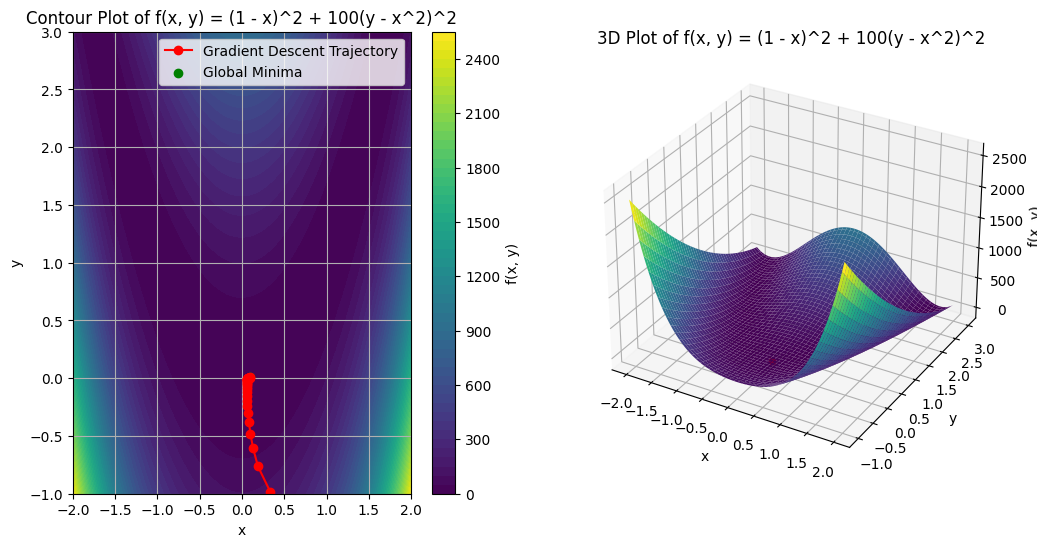

For f(x, y) = (1 - x)^2 + 100(y - x^2)^2:
Global Minima (x): 0.09080196313495675
Global Minima (y): 0.006496206830961396
Iterations: 36


In [76]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definition of function f(x, y)
def func(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Partial derivatives of the function with respect to x and y
def df_dx(x, y):
    return -2 * (1 - x) - 400 * x * (y - x**2)

def df_dy(x, y):
    return 200 * (y - x**2)

# Gradient descent algorithm
def grad_descent(lr, precision, n=np.random.randint(0, 100)):
    x = np.random.uniform(-1, 1)  # Adjust the range of initial random values
    y = np.random.uniform(-1, 1)  # Adjust the range of initial random values
    ini_x = [x]
    ini_y = [y]
    iterations = 0

    for _ in range(n):
        x_new = x - lr * df_dx(x, y)
        y_new = y - lr * df_dy(x, y)
        if np.sqrt((x_new - x)**2 + (y_new - y)**2) < precision:
            break
        x, y = x_new, y_new
        ini_x.append(x)
        ini_y.append(y)
        iterations += 1

    return x, y, iterations, ini_x, ini_y

lr = 0.001  # Reduce the learning rate
precision = 0.0001  # Increase the precision

# Execute Gradient Descent for f(x, y) = (1 - x)^2 + 100(y - x^2)^2
minima_x, minima_y, iter_f1, ini_x, ini_y = grad_descent(lr, precision)

# Plot the contour plot of the function
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

fig = plt.figure(figsize=(12, 6))

# 2D Contour Plot
plt.subplot(1, 2, 1)
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label='f(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of f(x, y) = (1 - x)^2 + 100(y - x^2)^2')

# Plot the trajectory of (x, y) values
plt.plot(ini_x, ini_y, '-o', color='red', label='Gradient Descent Trajectory')
plt.scatter(minima_x, minima_y, color='green', label='Global Minima')
plt.legend()
plt.grid(True)

# 3D Plot
ax = plt.subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.scatter(minima_x, minima_y, func(minima_x, minima_y), color='red', label='Global Minima')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('3D Plot of f(x, y) = (1 - x)^2 + 100(y - x^2)^2')

plt.show()

print("For f(x, y) = (1 - x)^2 + 100(y - x^2)^2:")
print("Global Minima (x):", minima_x)
print("Global Minima (y):", minima_y)
print("Iterations:", iter_f1)


func(x, y): Defines the function f(x,y)=(1−x)^2+100(y−x^2)*2.


df_dx(x, y): Computes the partial derivative of f with respect to x.

df_dy(x, y): Computes the partial derivative of f with respect to y.

Gradient Descent Algorithm (grad_descent):This function performs gradient descent optimization to find the minimum of the given function
f(x,y).
taking parameters
lr: Learning rate (step size for each iteration).
precision: Desired precision or tolerance for convergence.
n: Maximum number of iterations (default is a random integer between 0 and 100).


visualizes the optimization process using both a contour plot and a 3D surface plot. The contour plot displays the function's landscape in the
(x,y) plane, while the trajectory of the optimization process is overlaid on it. The 3D surface plot provides a perspective view of the function's surface, with the global minimum indicated by a red point.

